In [ ]:
#Importamos las librerias y el dataset
import pandas as pd
import numpy as np

data_tennis = pd.read_csv("tennis.csv", sep = ",")

In [ ]:
#Veamos el dataset
data_tennis

,clima,temperatura,humedad,ventoso,jugar_tenis
0,soleado,caluroso,alta,no,no
1,soleado,caluroso,alta,si,no
2,nublado,caluroso,alta,no,si
3,lluvioso,templado,alta,no,si
4,lluvioso,frio,normal,no,si
5,lluvioso,frio,normal,si,no
6,nublado,frio,normal,si,si
7,soleado,templado,alta,no,no
8,soleado,frio,normal,no,si
9,lluvioso,templado,normal,no,si


In [ ]:
#Shape
print(data_tennis.shape)

(14, 5)


In [ ]:
#Vemos si tenemos missings
data_tennis.count()

clima          14
temperatura    14
humedad        14
ventoso        14
jugar_tenis    14
dtype: int64

In [ ]:
#Analizamos el tipo de dato
data_tennis.dtypes

clima          object
temperatura    object
humedad        object
ventoso        object
jugar_tenis    object
dtype: object

In [30]:
#Comenzamos con la preparacion de nuestros datos
data_tennis_dummy = pd.get_dummies(data_tennis, drop_first=True, dtype = 'int')

In [31]:
#Veamos que paso
data_tennis_dummy #esto sobrecarga al modelo

,clima_nublado,clima_soleado,temperatura_frio,temperatura_templado,humedad_normal,ventoso_si,jugar_tenis_si
0,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1
3,0,0,0,1,0,0,1
4,0,0,1,0,1,0,1
5,0,0,1,0,1,1,0
6,1,0,1,0,1,1,1
7,0,1,0,1,0,0,0
8,0,1,1,0,1,0,1
9,0,0,0,1,1,0,1


In [ ]:
#Separamos los datos de entrada de la salida
X = data_tennis_dummy.drop('jugar_tenis_si', axis=1) #Elimino de mi dataset la variable a predecir
y = data_tennis_dummy.jugar_tenis_si #Defino el Target

In [ ]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [ ]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8888888888888888
% de aciertos sobre el set de evaluación: 0.4


**Insight**: ¿Qué interpretamos de nuestro árbol de decisión?

Rta: Nuestro modelo está realizando "Overfitting", ¿qué podemos hacer para evitarlo?

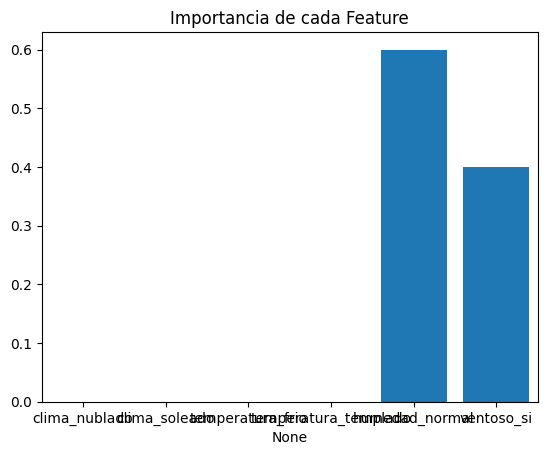

In [ ]:
#Importancia de las variables

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming importances and columns are defined
importances = tree.feature_importances_
columns = X.columns

# Use keyword arguments for x and y
sns.barplot(x=columns, y=importances, saturation=2.0)
plt.title('Importancia de cada Feature')
plt.show()